<a href="https://colab.research.google.com/github/ben-wycliff/cv-exam/blob/main/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/MyDrive/Computer Vision Exam/crop_and_grass_v3/crops_and_grass.zip"

In [ ]:
import os
import random
import cv2
import shutil
import glob

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import albumentations as A

# from fastai import *
from PIL import Image
from fastai.vision.data import ImageDataLoaders
from fastai.metrics import error_rate

In [ ]:
data_path = "./crops_and_grass"
categories = os.listdir(data_path)
img_count = []
for category in categories:
  count = len(os.listdir(os.path.join(data_path, category)))
  img_count.append(count)

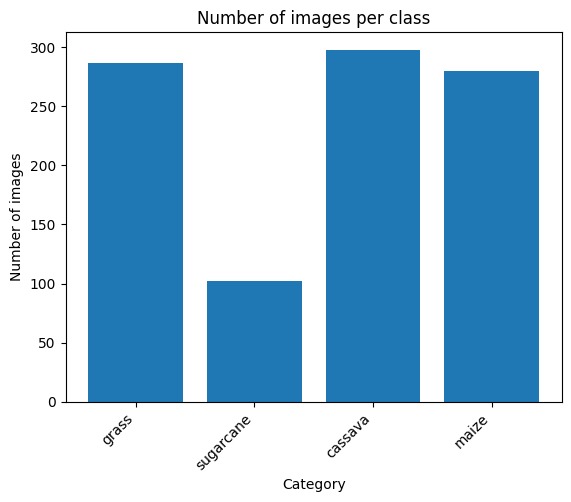

In [ ]:
ticks = [0, 1, 2, 3]
plt.bar(ticks, img_count)
plt.title("Number of images per class")
plt.xticks(ticks, labels=categories, rotation=45, ha="right");
plt.ylabel("Number of images")
plt.xlabel("Category")
plt.show()

In [ ]:
random.seed(40)

In [ ]:
def plot_images_from_folder(folder_path, num_images=3, grid_size=(4, 3)):
    fig, axes = plt.subplots(*grid_size, figsize=(8, 15))
    title = "Sample preview of all the images "\
            "in the dataset from different categories"
    fig.suptitle(title, fontsize="x-large")

    axes = axes.flatten()
    for i, subfolder in enumerate(os.listdir(folder_path)):
        subfolder_path = os.path.join(folder_path, subfolder)

        if os.path.isdir(subfolder_path):
            image_files = os.listdir(subfolder_path)
            selected_images = random.sample(image_files, min(num_images, len(image_files)))

            for j, image_file in enumerate(selected_images):
                image_path = os.path.join(subfolder_path, image_file)

                img = Image.open(image_path)
                img = np.array(img)

                axes[i*grid_size[1]+j].set_title(subfolder)
                axes[i*grid_size[1]+j].imshow(img, cmap='gray')
                axes[i*grid_size[1]+j].axis('off')
    plt.tight_layout()
    plt.show();

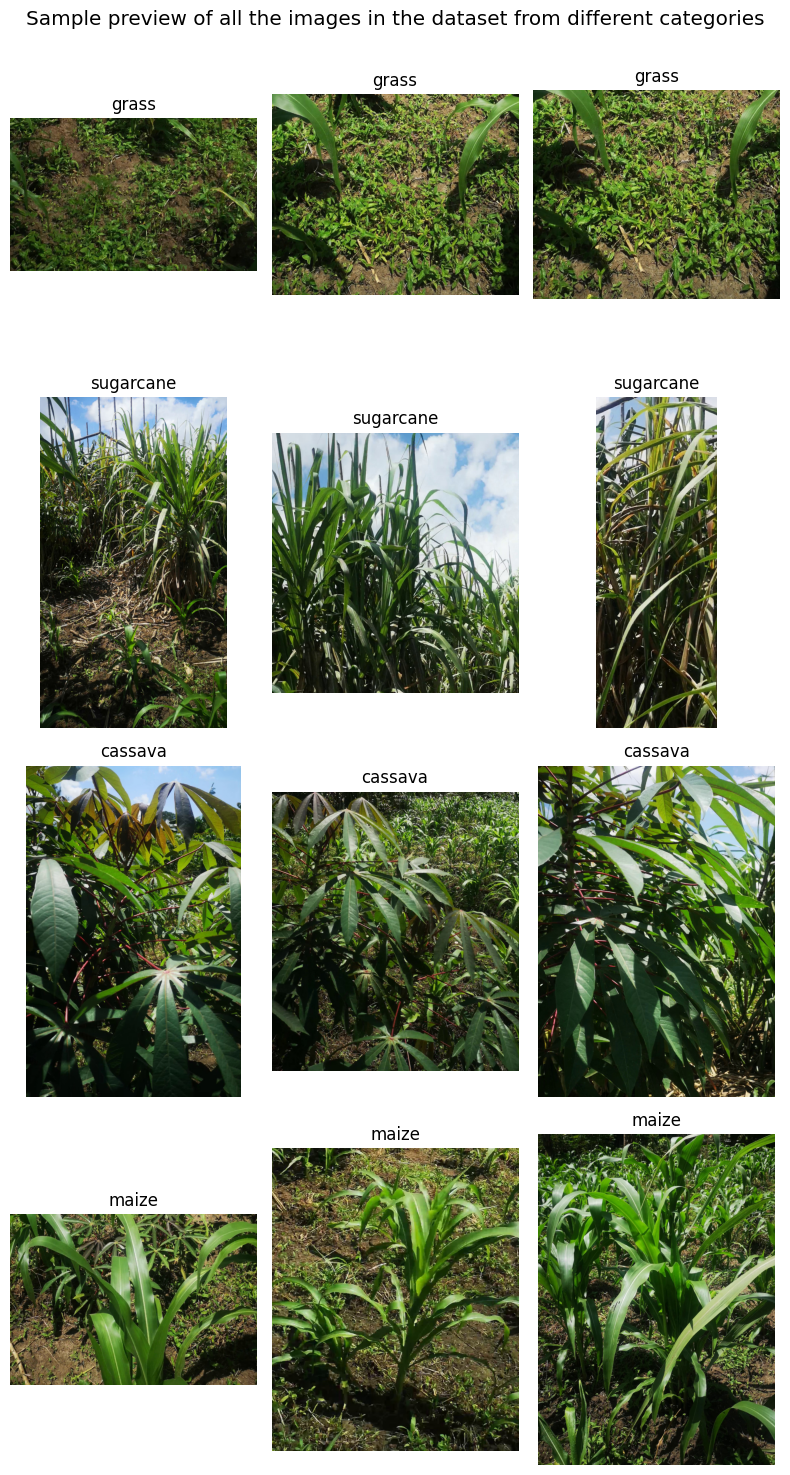

In [ ]:
plot_images_from_folder("./crops_and_grass")

In [ ]:
def count_image_shapes(folder_path, channels=False, shape=True):
    counts = {}

    # Iterate over subfolders and images
    for root, dirs, files in os.walk(folder_path):
        for file in files:
          # Read the image
          image_path = os.path.join(root, file)
          image = cv2.imread(image_path)

          # Get the image shape
          if channels:
            shape = image.shape[2]
          else:
            shape = image.shape[:2] # Consider only height and width, ignoring color channels

          # Update the shape counts dictionary
          if shape in counts:
              counts[shape] += 1
          else:
              counts[shape] = 1

    return counts

In [ ]:
image_count_per_channel_category = count_image_shapes("./dataset", channels=True)

In [ ]:
image_count_per_channel_category

{3: 4448}

In [ ]:
image_count_per_shape = count_image_shapes("./dataset")

In [ ]:
print(image_count_per_shape.keys())

dict_keys([(630, 556), (630, 512), (630, 630), (446, 387), (630, 575), (630, 571), (456, 411), (630, 533), (630, 590), (604, 630), (630, 541), (630, 536), (630, 551), (630, 548), (630, 532), (502, 438), (630, 627), (575, 492), (630, 559), (487, 446), (502, 436), (587, 630), (505, 443), (521, 386), (531, 446), (558, 416), (630, 573), (523, 411), (482, 373), (630, 581), (459, 411), (630, 602), (610, 630), (510, 480), (500, 449), (630, 550), (474, 452), (630, 603), (487, 450), (496, 442), (475, 429), (508, 405), (501, 429), (630, 543), (630, 577), (501, 443), (494, 426), (542, 485), (499, 433), (485, 429), (508, 428), (494, 455), (490, 438), (468, 438), (494, 425), (482, 440), (504, 435), (527, 408), (506, 432), (487, 440), (501, 432), (501, 421), (630, 580), (620, 630), (525, 471), (630, 451), (630, 628), (521, 630), (630, 447), (589, 489), (630, 626), (517, 630), (630, 473), (572, 446), (630, 593), (630, 432), (630, 553), (630, 504), (630, 617), (563, 449), (579, 461), (598, 491), (630,

In [ ]:
print(image_count_per_shape.values())

dict_values([46, 32, 2384, 4, 24, 306, 7, 28, 30, 18, 17, 25, 72, 20, 22, 1, 12, 21, 6, 1, 1, 6, 5, 13, 7, 14, 38, 2, 14, 3, 4, 18, 2, 1, 1, 6, 6, 7, 1, 1, 1, 1, 4, 6, 2, 1, 1, 3, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 36, 34, 8, 6, 29, 34, 8, 10, 13, 24, 16, 10, 26, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 20, 4, 67, 6, 14, 20, 3, 7, 1, 52, 17, 1, 27, 7, 12, 5, 4, 5, 6, 3, 7, 41, 6, 5, 27, 5, 5, 8, 4, 7, 5, 7, 7, 5, 35, 6, 6, 8, 6, 4, 1, 6, 7, 5, 1, 4, 1, 6, 1, 3, 7, 4, 1, 1, 7, 3, 4, 7, 1, 5, 1, 1, 6, 8, 4, 5, 5, 1, 4, 1, 6, 3, 4, 1, 1, 6, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 35, 11, 1, 5, 1, 6, 6, 5, 5, 5, 5, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 24, 64, 16, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 8, 3])


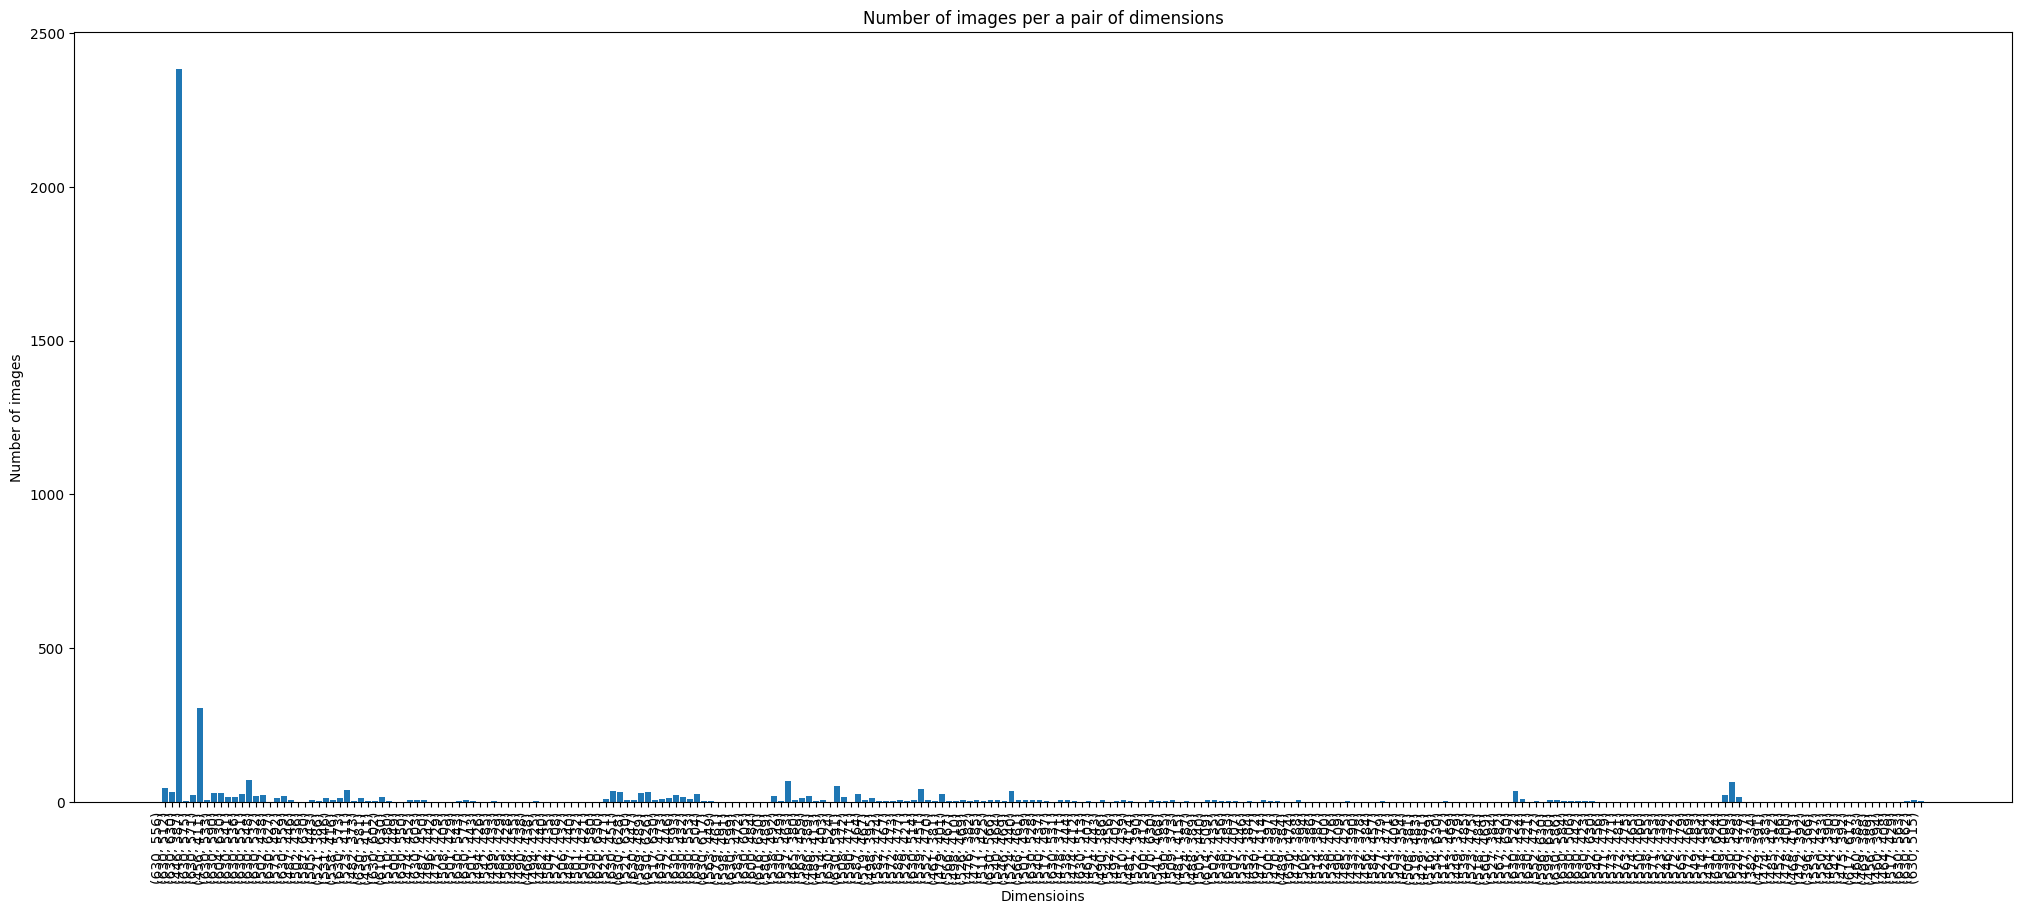

In [ ]:
ticks = [i for i in range(len(image_count_per_shape))]
plt.figure(figsize=(25, 10))
plt.bar(ticks, image_count_per_shape.values())
plt.title("Number of images per a pair of dimensions")
plt.xticks(ticks, labels=image_count_per_shape.keys(), rotation=90, ha="right");
plt.ylabel("Number of images")
plt.xlabel("Dimensioins")
plt.show()

In [ ]:
len(image_count_per_shape)

252

In [ ]:
image_shape_ratios = [i[1]/i[0] for i in image_count_per_shape.keys()]

In [ ]:
image_shape_ratios_thres = [1 if i > 0.8 else i for i in image_shape_ratios]

In [ ]:
print(image_shape_ratios_thres)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.7408829174664108, 1, 0.7455197132616488, 1, 0.7858508604206501, 0.7738589211618258, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.797244094488189, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.7741935483870968, 1, 1, 1, 1, 1, 1, 1, 0.7158730158730159, 1, 1, 0.7095238095238096, 1, 1, 1, 0.7507936507936508, 0.7797202797202797, 1, 0.6857142857142857, 1, 0.8, 1, 0.7975133214920072, 0.7962003454231433, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.7840466926070039, 1, 1, 1, 0.7983050847457627, 0.7904599659284497, 1, 0.7931726907630522, 1, 1, 1, 1, 0.7958412098298677, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.7761506276150628, 1, 1, 1, 1, 1, 0.7877551020408163, 1, 1, 1, 1, 0.7471264367816092, 1, 1, 1, 0.7857142857142857, 0.7328094302554028, 1, 0.7385496183206107, 0.7971311475409836, 1, 1, 1, 1, 0.7666666666666667, 1, 1, 1, 0.7492063492063492, 1, 0.794, 1, 0.7852760736196319, 0.7523809523809524, 1, 0.7786561

In [ ]:
!rm -rf data

In [ ]:
from tqdm import tqdm
categories = os.listdir('./crops_and_grass')

def convert_webp2jpg(src, dst):
  img = Image.open(src).convert("RGB")
  img.save(dst, "jpeg")
  return

def copy_img2dest(src, dst, img):
  if "webp" in img:
    convert_webp2jpg(os.path.join(src, img),
                        os.path.join(dst, img.split(".")[0]+".jpg"))
  else:
    shutil.copy(os.path.join(src, img),
                  os.path.join(dst, img))
  return

def populate_partition(name):
  src = f"./crops_and_grass/{name}/"
  par_imgs = os.listdir(src)
  #populate partitions
  for i, img in tqdm(enumerate(par_imgs)):
    # validation 60
    if i < 33:
      # print(f"creating validation partition for {name}")
      dst = f"data/val/{name}/"
      copy_img2dest(src, dst, img)
    # test 100
    elif i > 32 and i <= 82:
      # print(f"creating test partion for {name}")
      dst = f"data/test/{name}/"
      copy_img2dest(src, dst, img)
    # train for the rest
    else:
      # print(f"creating train partition for {name}")
      dst = f"data/train/{name}/"
      copy_img2dest(src, dst, img)
  return

for cat in categories:
  os.makedirs(f"./data/train/{cat}", exist_ok=True)
  os.makedirs(f"./data/test/{cat}", exist_ok=True)
  os.makedirs(f"./data/val/{cat}", exist_ok=True)
  populate_partition(cat)

287it [00:00, 559.97it/s]
102it [00:00, 323.71it/s]
298it [00:01, 233.33it/s]
280it [00:01, 243.36it/s]


In [ ]:
for part in ["test", "train", "val"]:
  print(f"\nFile count in partition {part}")
  subdirectories = glob.glob(os.path.join(f"data/{part}", '*'))

  # Iterate over each subdirectory and print the file count
  for subdirectory in subdirectories:
      # Get the file count for the current subdirectory
      file_count = len(os.listdir(subdirectory))

      # Print the subdirectory name and file count
      print(f"Subdirectory: {subdirectory} - {file_count}")


File count in partition test
Subdirectory: data/test/grass - 50
Subdirectory: data/test/sugarcane - 50
Subdirectory: data/test/cassava - 50
Subdirectory: data/test/maize - 50

File count in partition train
Subdirectory: data/train/grass - 204
Subdirectory: data/train/sugarcane - 19
Subdirectory: data/train/cassava - 215
Subdirectory: data/train/maize - 197

File count in partition val
Subdirectory: data/val/grass - 33
Subdirectory: data/val/sugarcane - 33
Subdirectory: data/val/cassava - 33
Subdirectory: data/val/maize - 33


In [ ]:
# let's augment the train set using albumentations
def augment_images(folder_path, max_img_count):
    # Define the augmentation pipeline
    transform = A.Compose([
        A.CLAHE(),
        A.MedianBlur(),
        A.Sharpen(),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(),
        A.Rotate(limit=90),
        A.VerticalFlip(p=0.5)
        # Add more augmentations if needed
    ])

    # Get the list of image files in the folder
    image_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
    img_count = len(image_files)
    while img_count < max_img_count:
      # Randomly select images
      file = random.sample(image_files, 1)

      # Generate augmented versions of the selected images
      # Read the image
      image_path = os.path.join(folder_path, file[0])
      image = cv2.imread(image_path)

      # Apply the augmentation pipeline
      augmented = transform(image=image)

      # Save the augmented images
        # for i in range(num_augmentations):
      augmented_image = augmented['image']
      augmented_file = f"{file[0].split('.')[0]}_augmented_{img_count}.jpg"  # Modify the filename as per your preference
      augmented_path = os.path.join(folder_path, augmented_file)
      cv2.imwrite(augmented_path, augmented_image)
      img_count += 1
      print(f"Generated {img_count - len(image_files)} augmented versions of {file}.")


In [ ]:
augment_images("data/train/cassava", 500)
augment_images("data/train/maize", 500)
augment_images("data/train/sugarcane", 500)
augment_images("data/train/grass", 500)

Generated 1 augmented versions of ['cassava (115).jpg'].
Generated 2 augmented versions of ['cassava (215).jpg'].
Generated 3 augmented versions of ['cassava (271).jpg'].
Generated 4 augmented versions of ['cassava (83).jpg'].
Generated 5 augmented versions of ['cassava (216).jpg'].
Generated 6 augmented versions of ['cassava (291).jpg'].
Generated 7 augmented versions of ['cassava (263).jpg'].
Generated 8 augmented versions of ['cassava (215).jpg'].
Generated 9 augmented versions of ['cassava (104).jpg'].
Generated 10 augmented versions of ['cassava (207).jpg'].
Generated 11 augmented versions of ['cassava (118).jpg'].
Generated 12 augmented versions of ['cassava (124).jpg'].
Generated 13 augmented versions of ['cassava (283).jpg'].
Generated 14 augmented versions of ['cassava (291).jpg'].
Generated 15 augmented versions of ['cassava (63).jpg'].
Generated 16 augmented versions of ['cassava (108).jpg'].
Generated 17 augmented versions of ['cassava (216).jpg'].
Generated 18 augmented ve

In [ ]:
for part in ["test", "train", "val"]:
  print(f"\nFile count in partition {part}")
  subdirectories = glob.glob(os.path.join(f"data/{part}", '*'))

  # Iterate over each subdirectory and print the file count
  for subdirectory in subdirectories:
      # Get the file count for the current subdirectory
      file_count = len(os.listdir(subdirectory))

      # Print the subdirectory name and file count
      print(f"Subdirectory: {subdirectory} - {file_count}")


File count in partition test
Subdirectory: data/test/grass - 50
Subdirectory: data/test/sugarcane - 50
Subdirectory: data/test/cassava - 50
Subdirectory: data/test/maize - 50

File count in partition train
Subdirectory: data/train/grass - 500
Subdirectory: data/train/sugarcane - 500
Subdirectory: data/train/cassava - 500
Subdirectory: data/train/maize - 500

File count in partition val
Subdirectory: data/val/grass - 33
Subdirectory: data/val/sugarcane - 33
Subdirectory: data/val/cassava - 33
Subdirectory: data/val/maize - 33


In [ ]:
!zip -r data.zip data

  adding: data/ (stored 0%)
  adding: data/train/ (stored 0%)
  adding: data/train/grass/ (stored 0%)
  adding: data/train/grass/grass  (40)_augmented_277.jpg (deflated 0%)
  adding: data/train/grass/grass  (53)_augmented_283.jpg (deflated 1%)
  adding: data/train/grass/grass  (154)_augmented_396.jpg (deflated 0%)
  adding: data/train/grass/grass  (244)_augmented_322.jpg (deflated 1%)
  adding: data/train/grass/grass  (151)_augmented_482.jpg (deflated 0%)
  adding: data/train/grass/grass  (53)_augmented_364.jpg (deflated 1%)
  adding: data/train/grass/grass  (26)_augmented_328.jpg (deflated 2%)
  adding: data/train/grass/grass  (146)_augmented_338.jpg (deflated 2%)
  adding: data/train/grass/grass  (62)_augmented_343.jpg (deflated 1%)
  adding: data/train/grass/grass  (94)_augmented_471.jpg (deflated 0%)
  adding: data/train/grass/grass  (42)_augmented_402.jpg (deflated 0%)
  adding: data/train/grass/grass  (215)_augmented_250.jpg (deflated 0%)
  adding: data/train/grass/grass  (63)_au

In [ ]:
!cp data.zip "/content/drive/MyDrive/Computer Vision Exam/"